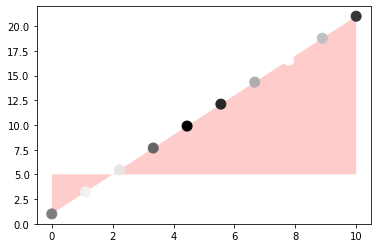

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data...
x = np.linspace(0,10,10)
z = np.sin(x)
y= 2*x+1

# Plot...

plt.fill_between(x, 5, y, facecolor='red', alpha=0.2)
plt.scatter(x, y, c=z, s=100)
#plt.gray()
plt.show()

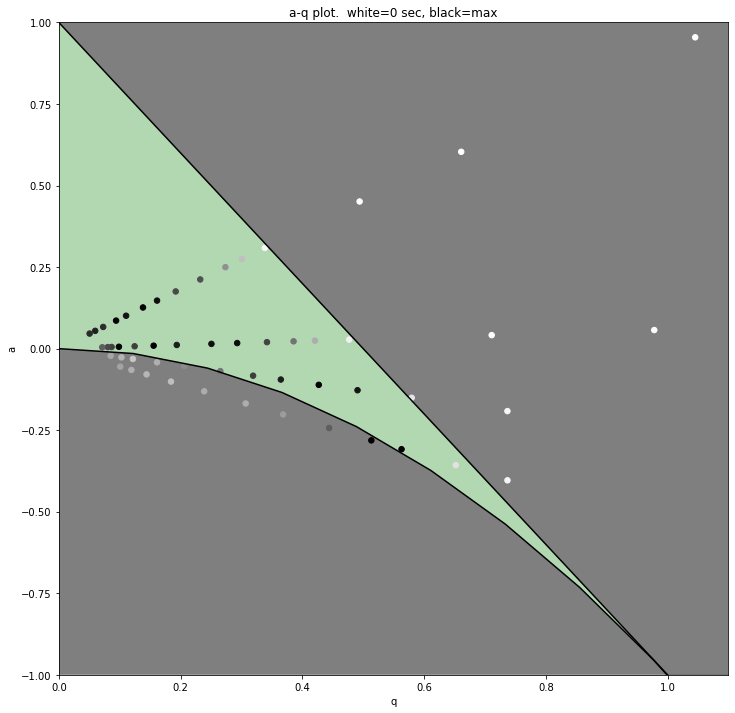

In [4]:
# Data from Jan 2021 on four saddles.  Import arrys of means from saddle data.
# 
#
#
#

import numpy as np
import matplotlib.pyplot as plt

#constant(s)
grav=9800  #units mm/s/s

#raw data.  time in seconds.  Frequency in rps.
data_p2= np.array([ 1.08,  1.46,  1.26,  2.82, 11.26, 18.58, 24.32, 31.12, 30.8, 29.08, 32.66, 24.94, 32.64, 24.76, 23.58, 20.9 ]) #P2 Beta=1.06
data_p3 = np.array([ 1.82,  1.58,  1.7 ,  2.24,  8.48, 13.4 , 20.24, 21.02, 27.32, 28.84, 26.62, 28.58, 24.04, 25.4 , 24.2 ])  #P3 Beta=2.68
data_p4 = np.array([0.856, 0.724, 0.774, 0.89 , 1.244, 5.18 , 5.18 , 3.54 , 2.46 , 2.14 , 2.16 , 1.84 , 2.00, 2.12 , 2.34 ])  #P4 Beta=0.55
data_p5 = np.array([ 1.  ,  1.18,  1.5 ,  2.58, 15.54, 16.8 , 15.02, 12.98,  9.62, 8.12,  5.9 ,  4.52,  5.62,  6.54])  #P5 Beta=0.77

rps_p2 = np.array([0.59, 0.81, 0.95, 1.16, 1.235, 1.29, 1.37, 1.48, 1.60, 1.82, 2.03, 2.27, 2.55, 2.72, 2.825, 3.00])
rps_p3 = np.array([0.66, 0.83, 0.96, 1.16, 1.23, 1.29, 1.40, 1.54, 1.68, 1.815, 2.03, 2.20, 2.50, 2.76, 3.00])
rps_p4 = np.array([0.63, 0.75, 0.90, 1.11, 1.18, 1.27, 1.33, 1.43, 1.57, 1.72, 1.95, 2.22, 2.51, 2.76, 3.00])
rps_p5 = np.array([0.61, 0.79, 1.02, 1.15, 1.25, 1.34, 1.45, 1.55, 1.70, 1.93, 2.18, 2.51, 2.73, 3.00])

#coefficients are taken from fit to curvatures.  Positive coefficient is Beta * (negative coeff.)
coeff_p2 = 0.00251
coeff_p3 = 0.000997
coeff_p4 = 0.00466
coeff_p5 = 0.00349

beta_p2 = 1.06
beta_p3 = 2.68
beta_p4 = 0.57
beta_p5 = 0.77

#normalize data to maximum value

maximum = np.amax([data_p2.max(), data_p3.max(), data_p4.max(), data_p5.max()]) 
data_n_p2 = data_p2/maximum
data_n_p3 = data_p3/maximum
data_n_p4 = data_p4/maximum
data_n_p5 = data_p5/maximum

# fig = plt.figure()
# plt.title('Normalized Trapping time vs. frequency')
# plt.xlabel('Rotation speed (RPS)')
# plt.ylabel('Trapping time (s)')
# plt.plot(rps_p2, data_n_p2,  'ro')
# plt.plot(rps_p3, data_n_p3,  'yo')
# plt.plot(rps_p4, data_n_p4,  'go')
# plt.plot(rps_p5, data_n_p5,  'bo')
# plt.show()
#

# Create reference lines for plot
q=np.linspace(0,1.1,10)
line1=1-2*q
line2=-q**2


#  Cast frequency data into (a,q) form.
q_p2 = grav*coeff_p2* (beta_p2+1) / (2*(2*np.pi*rps_p2)**2)  #see NB p 6.
q_p3 = grav*coeff_p3* (beta_p3+1) / (2*(2*np.pi*rps_p3)**2)  #see NB p 6.
q_p4 = grav*coeff_p4* (beta_p4+1) / (2*(2*np.pi*rps_p4)**2)  #see NB p 6.
q_p5 = grav*coeff_p5* (beta_p5+1) / (2*(2*np.pi*rps_p5)**2)  #see NB p 6.

slope_p2 = 2*(beta_p2 - 1)/(beta_p2 + 1)
slope_p3 = 2*(beta_p3 - 1)/(beta_p3 + 1)
slope_p4 = 2*(beta_p4 - 1)/(beta_p4 + 1)
slope_p5 = 2*(beta_p5 - 1)/(beta_p5 + 1)

a_p2 = q_p2 * slope_p2
a_p3 = q_p3 * slope_p3
a_p4 = q_p4 * slope_p4
a_p5 = q_p5 * slope_p5




fig = plt.figure(figsize=(12, 12))
plt.title('a-q plot.  white=0 sec, black=max')
plt.xlabel('q')
plt.ylabel('a')
plt.plot(q,line1, 'k')
plt.plot(q,line2, 'k')
plt.fill_between(q, line1, 1, facecolor='black', alpha=0.5)
plt.fill_between(q, -1, line2, facecolor='black', alpha=0.5)
plt.fill_between(q, line1, line2, facecolor='green', alpha=0.3)
plt.scatter(q_p2, a_p2, c=1-data_n_p2, s=30)
plt.scatter(q_p3, a_p3, c=1-data_n_p3, s=30)
plt.scatter(q_p4, a_p4, c=1-data_n_p4, s=30)
plt.scatter(q_p5, a_p5, c=1-data_n_p5, s=30)
plt.gray()
plt.xlim([0, 1.1])
plt.ylim([-1, 1])
plt.show()

In [5]:
data_n_p4

array([0.02620943, 0.02216779, 0.02369871, 0.02725046, 0.03808941,
       0.1586038 , 0.1586038 , 0.10838947, 0.07532149, 0.06552358,
       0.06613595, 0.05633803, 0.06123699, 0.06491121, 0.07164727])

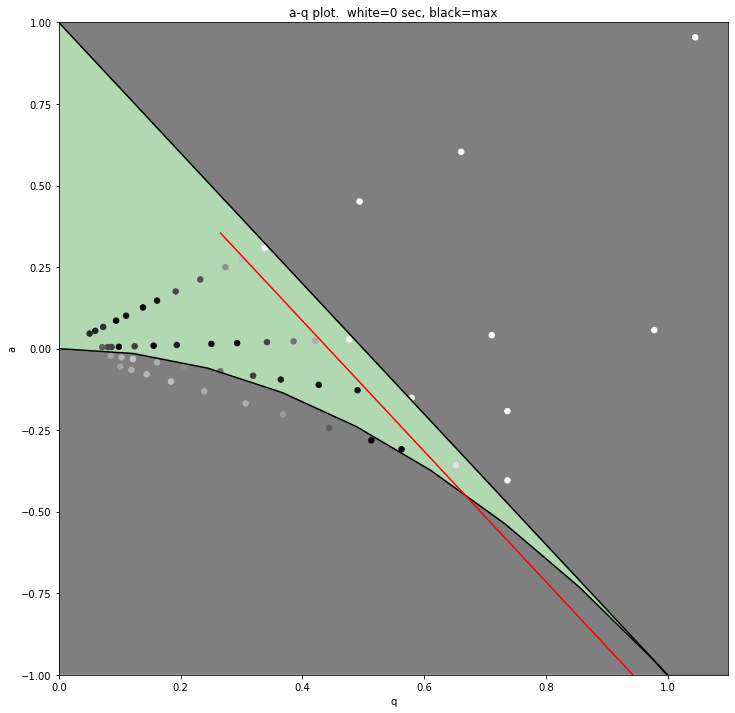

In [9]:
#here's a notebook to plot other things, like the locus of q for which omega=const.

import numpy as np
import matplotlib.pyplot as plt

#constant(s)
grav=9800  #units mm/s/s

#raw data.  time in seconds.  Frequency in rps.
data_p2= np.array([ 1.08,  1.46,  1.26,  2.82, 11.26, 18.58, 24.32, 31.12, 30.8, 29.08, 32.66, 24.94, 32.64, 24.76, 23.58, 20.9 ]) #P2 Beta=1.06
data_p3 = np.array([ 1.82,  1.58,  1.7 ,  2.24,  8.48, 13.4 , 20.24, 21.02, 27.32, 28.84, 26.62, 28.58, 24.04, 25.4 , 24.2 ])  #P3 Beta=2.68
data_p4 = np.array([0.856, 0.724, 0.774, 0.89 , 1.244, 5.18 , 5.18 , 3.54 , 2.46 , 2.14 , 2.16 , 1.84 , 2.00, 2.12 , 2.34 ])  #P4 Beta=0.55
data_p5 = np.array([ 1.  ,  1.18,  1.5 ,  2.58, 15.54, 16.8 , 15.02, 12.98,  9.62, 8.12,  5.9 ,  4.52,  5.62,  6.54])  #P5 Beta=0.77

rps_p2 = np.array([0.59, 0.81, 0.95, 1.16, 1.235, 1.29, 1.37, 1.48, 1.60, 1.82, 2.03, 2.27, 2.55, 2.72, 2.825, 3.00])
rps_p3 = np.array([0.66, 0.83, 0.96, 1.16, 1.23, 1.29, 1.40, 1.54, 1.68, 1.815, 2.03, 2.20, 2.50, 2.76, 3.00])
rps_p4 = np.array([0.63, 0.75, 0.90, 1.11, 1.18, 1.27, 1.33, 1.43, 1.57, 1.72, 1.95, 2.22, 2.51, 2.76, 3.00])
rps_p5 = np.array([0.61, 0.79, 1.02, 1.15, 1.25, 1.34, 1.45, 1.55, 1.70, 1.93, 2.18, 2.51, 2.73, 3.00])

#coefficients are taken from fit to curvatures.  Positive coefficient is Beta * (negative coeff.)
coeff_p2 = 0.00251
coeff_p3 = 0.000997
coeff_p4 = 0.00466
coeff_p5 = 0.00349

beta_p2 = 1.06
beta_p3 = 2.68
beta_p4 = 0.57
beta_p5 = 0.77

#normalize data to maximum value

maximum = np.amax([data_p2.max(), data_p3.max(), data_p4.max(), data_p5.max()]) 
data_n_p2 = data_p2/maximum
data_n_p3 = data_p3/maximum
data_n_p4 = data_p4/maximum
data_n_p5 = data_p5/maximum

# fig = plt.figure()
# plt.title('Normalized Trapping time vs. frequency')
# plt.xlabel('Rotation speed (RPS)')
# plt.ylabel('Trapping time (s)')
# plt.plot(rps_p2, data_n_p2,  'ro')
# plt.plot(rps_p3, data_n_p3,  'yo')
# plt.plot(rps_p4, data_n_p4,  'go')
# plt.plot(rps_p5, data_n_p5,  'bo')
# plt.show()
#

# Create reference lines for plot
q=np.linspace(0,1.1,10)
line1=1-2*q
line2=-q**2

#create data for other lines

beta = np.linspace(0.1,5,50)
alpha_p = 0.0027
omega = 7.73
q_set = grav*alpha_p*(beta+1)/(2*beta*omega**2)
a_set = q_set*2*(beta - 1)/(beta  + 1)

#  Cast frequency data into (a,q) form.
q_p2 = grav*coeff_p2* (beta_p2+1) / (2*(2*np.pi*rps_p2)**2)  #see NB p 6.
q_p3 = grav*coeff_p3* (beta_p3+1) / (2*(2*np.pi*rps_p3)**2)  #see NB p 6.
q_p4 = grav*coeff_p4* (beta_p4+1) / (2*(2*np.pi*rps_p4)**2)  #see NB p 6.
q_p5 = grav*coeff_p5* (beta_p5+1) / (2*(2*np.pi*rps_p5)**2)  #see NB p 6.

slope_p2 = 2*(beta_p2 - 1)/(beta_p2 + 1)
slope_p3 = 2*(beta_p3 - 1)/(beta_p3 + 1)
slope_p4 = 2*(beta_p4 - 1)/(beta_p4 + 1)
slope_p5 = 2*(beta_p5 - 1)/(beta_p5 + 1)

a_p2 = q_p2 * slope_p2
a_p3 = q_p3 * slope_p3
a_p4 = q_p4 * slope_p4
a_p5 = q_p5 * slope_p5




fig = plt.figure(figsize=(12, 12))
plt.title('a-q plot.  white=0 sec, black=max')
plt.xlabel('q')
plt.ylabel('a')
plt.plot(q,line1, 'k')
plt.plot(q,line2, 'k')
plt.plot(q_set, a_set, 'r')
plt.fill_between(q, line1, 1, facecolor='black', alpha=0.5)
plt.fill_between(q, -1, line2, facecolor='black', alpha=0.5)
plt.fill_between(q, line1, line2, facecolor='green', alpha=0.3)
plt.scatter(q_p2, a_p2, c=1-data_n_p2, s=30)
plt.scatter(q_p3, a_p3, c=1-data_n_p3, s=30)
plt.scatter(q_p4, a_p4, c=1-data_n_p4, s=30)
plt.scatter(q_p5, a_p5, c=1-data_n_p5, s=30)
plt.gray()
plt.xlim([0, 1.1])
plt.ylim([-1, 1])
plt.show()

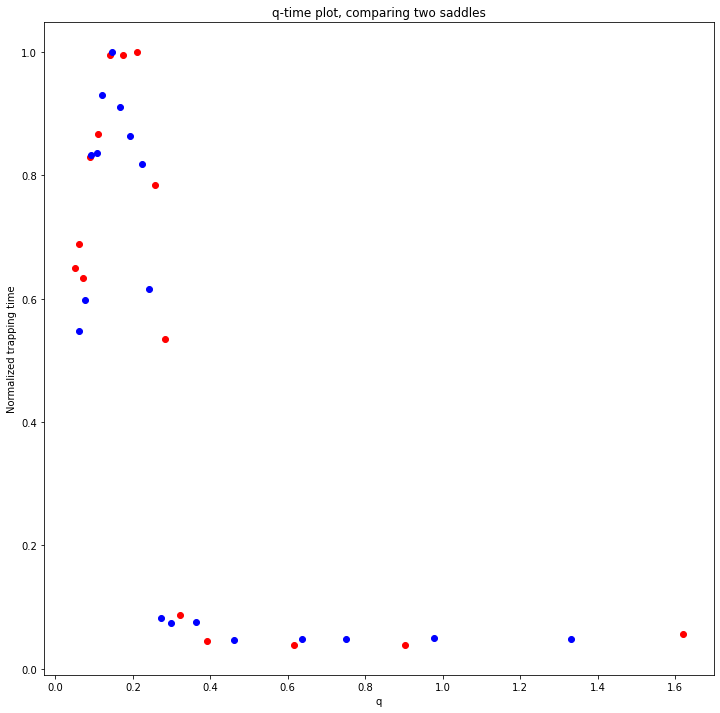

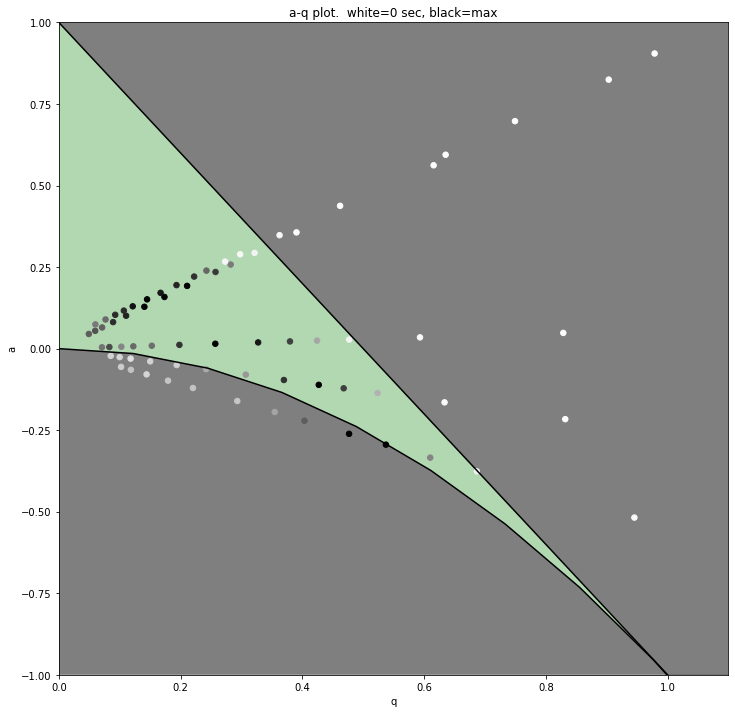

In [26]:
# Data from Feb 1-2, 2021 on four saddles in a series with const positive curvature.
# Fifth saddle, P6, has Beta=1.65, with negative curvature set to equal the positive curvature
# of the saddles P2-P5.  Positive curvature larger by 1.65.  
# Import arrys of means from saddle data.
# 

import numpy as np
import matplotlib.pyplot as plt

#constant(s)
grav=9800  #units mm/s/s


# frequency data, copied from measurement Jupyter NB.  Frequency in rps.
rps_p2 = np.array([0.49, 0.74, 0.88, 1.04, 1.16, 1.23, 1.30, 1.4, 1.58, 1.80, 2.05, 2.29, 2.5, 2.78, 3.01])
rps_p3 = np.array([0.53, 0.71, 0.86, 1.08, 1.19, 1.27, 1.33, 1.47, 1.62, 1.80, 2.03, 2.26, 2.53, 2.76, 3.04 ])
rps_p4 = np.array([0.58, 0.72, 0.82, 0.98, 1.15, 1.22, 1.30, 1.38, 1.50, 1.60, 1.76, 2.03, 2.25, 2.51, 2.77, 2.98])
rps_p5 = np.array([0.59, 0.78, 0.96, 1.10, 1.21, 1.28, 1.34, 1.44, 1.58, 1.78, 1.99, 2.26, 2.55, 2.77, 3.00])
rps_p6 = np.array([0.96, 1.12, 1.28, 1.39, 1.63, 1.84, 2.03, 2.12, 2.25, 2.35, 2.52, 2.71, 2.91, 3.18, 3.39, 3.64, 4.00, 4.52])
   


#raw data.  time in seconds.  
data_p2= np.array([ 0.98,  1.16,  1.36,  1.88,  3.38, 16.36, 33.86, 40.84, 44.9 ,
        36.26, 25.92, 26.88, 22.04, 32.2 , 25.06]) #P2 Beta=1.06
data_p3 = np.array([ 2.3 ,  1.58,  1.58,  1.84,  3.58, 22.02, 32.26, 41.16, 41.  ,
        40.96, 35.72, 34.16, 26.1 , 28.34, 26.76]) #P3 Beta=2.68
data_p4 = np.array([ 0.96,  1.02,  1.12,  1.14,  1.46,  5.3 , 10.02, 10.  ,  6.72,
         4.18,  2.98,  3.08,  3.02,  2.48,  3.14,  2.74])  #P4 Beta=0.55
data_p5 = np.array([ 0.78,  0.88,  0.94,  1.44,  9.54, 22.6 , 29.78, 24.2 , 12.54,
        10.42,  6.22,  5.88,  4.32,  5.48,  5.78])  #P5 Beta=0.77
data_p6 = np.array([ 0.94 ,  0.962,  0.942,  0.932,  0.886,  1.446,  1.44 ,  1.6  ,
        11.86 , 15.76 , 16.62 , 17.54 , 19.24 , 17.9  , 16.1  , 16.02 ,
        11.52 , 10.54 ])  #P6 Beta=2.65


#coefficients are taken from fit to curvatures.  Positive coefficient is Beta * (negative coeff.)
coeff_p2 = 0.00251
coeff_p3 = 0.000997
coeff_p4 = 0.00466
coeff_p5 = 0.00349
coeff_p6 = 0.00271

beta_p2 = 1.06
beta_p3 = 2.68
beta_p4 = 0.57
beta_p5 = 0.77
beta_p6 = 2.65

#normalize data to maximum value

maximum = np.amax([data_p2.max(), data_p3.max(), data_p4.max(), data_p5.max()]) 
data_n_p2 = data_p2/maximum
data_n_p3 = data_p3/maximum
data_n_p4 = data_p4/maximum
data_n_p5 = data_p5/maximum
data_n_p6 = data_p6/maximum

# fig = plt.figure()
# plt.title('Normalized Trapping time vs. frequency')
# plt.xlabel('Rotation speed (RPS)')
# plt.ylabel('Trapping time (s)')
# plt.plot(rps_p2, data_n_p2,  'ro')
# plt.plot(rps_p3, data_n_p3,  'yo')
# plt.plot(rps_p4, data_n_p4,  'go')
# plt.plot(rps_p5, data_n_p5,  'bo')
# plt.show()
#

# Create reference lines for plot
q=np.linspace(0,1.1,10)
line1=1-2*q
line2=-q**2


#  Cast frequency data into (a,q) form.
q_p2 = grav*coeff_p2* (beta_p2+1) / (2*(2*np.pi*rps_p2)**2)  #see NB p 6.
q_p3 = grav*coeff_p3* (beta_p3+1) / (2*(2*np.pi*rps_p3)**2)  #see NB p 6.
q_p4 = grav*coeff_p4* (beta_p4+1) / (2*(2*np.pi*rps_p4)**2)  #see NB p 6.
q_p5 = grav*coeff_p5* (beta_p5+1) / (2*(2*np.pi*rps_p5)**2)  #see NB p 6.
q_p6 = grav*coeff_p6* (beta_p6+1) / (2*(2*np.pi*rps_p6)**2)  #see NB p 6.

slope_p2 = 2*(beta_p2 - 1)/(beta_p2 + 1)
slope_p3 = 2*(beta_p3 - 1)/(beta_p3 + 1)
slope_p4 = 2*(beta_p4 - 1)/(beta_p4 + 1)
slope_p5 = 2*(beta_p5 - 1)/(beta_p5 + 1)
slope_p6 = 2*(beta_p6 - 1)/(beta_p6 + 1)

a_p2 = q_p2 * slope_p2
a_p3 = q_p3 * slope_p3
a_p4 = q_p4 * slope_p4
a_p5 = q_p5 * slope_p5
a_p6 = q_p6 * slope_p6

fig = plt.figure(figsize=(12, 12))
plt.title('q-time plot, comparing two saddles')
plt.xlabel('q')
plt.ylabel('Normalized trapping time')

plt.plot(q_p3, data_p3/data_p3.max(),  'ro')
plt.plot(q_p6, data_p6/data_p6.max(), 'bo')

plt.show()


fig = plt.figure(figsize=(12, 12))
plt.title('a-q plot.  white=0 sec, black=max')
plt.xlabel('q')
plt.ylabel('a')
plt.plot(q,line1, 'k')
plt.plot(q,line2, 'k')
plt.fill_between(q, line1, 1, facecolor='black', alpha=0.5)
plt.fill_between(q, -1, line2, facecolor='black', alpha=0.5)
plt.fill_between(q, line1, line2, facecolor='green', alpha=0.3)
plt.scatter(q_p2, a_p2, c=1-data_n_p2, s=30)
plt.scatter(q_p3, a_p3, c=1-data_n_p3, s=30)
plt.scatter(q_p6, a_p6+0.02, c=1-data_n_p6, s=30)
plt.scatter(q_p4, a_p4, c=1-data_n_p4, s=30)
plt.scatter(q_p5, a_p5, c=1-data_n_p5, s=30)
plt.gray()
plt.xlim([0, 1.1])
plt.ylim([-1, 1])
plt.show()